# Personal Finacial Planner

In [1]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
#from coinbase.wallet.client import Client
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment
load_dotenv()

True

In [3]:
my_btc = 1.2
my_eth = 5.3

# current amount of crypto assets
crypto_assets = {
    "my_crypto": [my_btc, my_eth]}

#crypto tickers
crypto_tickers = ["BTC", "ETH"]

In [4]:
# Create the shares DataFrame
ct_shares = pd.DataFrame(crypto_assets, index=crypto_tickers)

# Display shares data
ct_shares


,my_crypto
BTC,1.2
ETH,5.3


In [5]:
#

In [5]:
 #Fetch current BTC price
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
response = requests.get(btc_url)
#print(response)

data = response.json()
print(data)

btc_price = data['data']['1']["quotes"]["USD"]["price"]

#print(btc_price)

# Fetch current ETH price
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"
response = requests.get(eth_url)
#print(response)

data = response.json()
#print(data)


cyrpto = dictionary['id']['cypto']['type']['symbol']
cyrpto = dictionary['id']['details']

{'data': {'1': {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'website_slug': 'bitcoin', 'rank': 1, 'circulating_supply': 18848518, 'total_supply': 18848518, 'max_supply': 21000000, 'quotes': {'USD': {'price': 63959.0, 'volume_24h': 42052027631, 'market_cap': 1204081686731, 'percentage_change_1h': -0.256669227617637, 'percentage_change_24h': 2.9252052961229, 'percentage_change_7d': 11.0928337323587, 'percent_change_1h': -0.256669227617637, 'percent_change_24h': 2.9252052961229, 'percent_change_7d': 11.0928337323587}, 'CAD': {'price': 79085.3035, 'volume_24h': 51997332165.7315, 'market_cap': 1488847005642.88, 'percent_change_1h': -0.256669227617637, 'percent_change_24h': 2.9252052961229, 'percent_change_7d': 11.0928337323587}}, 'last_updated': 1634684357}}, 'metadata': {'timestamp': 1634684357, 'num_cryptocurrencies': 3105, 'error': None}}


In [5]:
eth_price = data['data']['1027']["quotes"]["USD"]["price"]

#print(eth_price)


# Compute current value of my crpto
my_btc_value = btc_price * ct_shares.loc["BTC"]["my_crypto"]
my_eth_value = eth_price * ct_shares.loc["ETH"]["my_crypto"]

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

###Stock Portfolio###


# Set current amount of shares
my_agg = 200
my_spy = 50

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")
# Format current date as ISO format
today = pd.Timestamp("2020-10-09", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_closing_prices = pd.DataFrame()


df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    #start=start_date,
    #end=end_date,
    limit=1,
).df

for ticker in tickers:
    df_closing_prices[ticker] = df_ticker[ticker]["close"]

# (use a limit=1000 parameter to call the most recent 1000 days of data)


#df_closing_prices


#Latest closing price
agg_price = (float(df_ticker["AGG"]["close"]))
spy_price = (float(df_ticker["SPY"]["close"]))

#Calculate value at close
agg_close_price = agg_price * my_agg
spy_close_price = spy_price * my_spy

# Print AGG and SPY close prices
print(f"The current value of your {my_agg} AGG is ${agg_close_price}")
print(f"The current value of your {my_spy} SPY is ${spy_close_price}")

The current value of your 1.2 BTC is $74355.60
The current value of your 5.3 ETH is $19855.44


ValueError: ('Key ID must be given to access Alpaca trade API', ' (env: APCA_API_KEY_ID)')

## Savings Health Analysis

In [139]:
# Set monthly household income
monthly_income = 12000

In [140]:
#combined shares and cypto totals

num1 = (float(agg_close_price))
num2 = (float(spy_close_price))

share_total = num1 + num2

share_total

bitc = (float(my_btc_value))
ethc = (float(my_eth_value))

crypto_total = bitc + ethc

In [141]:
# Consolidate financial assets data
savings_data = [ share_total, crypto_total]  

#Creating Savings DataFrame

df_savings = pd.DataFrame(savings_data, columns=["Amount"], index=["Shares", "Crypto"])

df_savings       

,Amount
Shares,44715.000
Crypto,83851.207


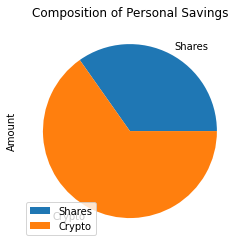

In [142]:
df_savings.plot.pie(y= 'Amount', title= "Composition of Personal Savings");

In [143]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_total + share_total

In [144]:
# Validate saving health
if emergency_fund < total_savings:
    print ("Congratulations! You have enough money in your emergency fund. ")

Congratulations! You have enough money in your emergency fund. 


## Retirement Planning

In [152]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-10-09', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-10-09', tz='America/New_York').isoformat()

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    #start=start_date,
    #end=end_date,
    limit=1000,
).df

df_stock_data.head()

AGG                                        SPY  \
                             open     high     low    close   volume    open   
time                                                                           
2017-10-19 00:00:00-04:00  109.71  109.750  109.54  109.610  1747693  254.82   
2017-10-20 00:00:00-04:00  109.32  109.405  109.26  109.305  1768427  256.70   
2017-10-23 00:00:00-04:00  109.40  109.470  109.36  109.410  1571621  257.48   
2017-10-24 00:00:00-04:00  109.23  109.290  109.17  109.200  1492997  256.59   
2017-10-25 00:00:00-04:00  108.96  109.130  108.95  109.110  2706969  256.19   

                                                             
                             high     low   close    volume  
time                                                         
2017-10-19 00:00:00-04:00  255.82  254.35  255.82  41439302  
2017-10-20 00:00:00-04:00  257.14  256.42  257.08  41153383  
2017-10-23 00:00:00-04:00  257.51  256.02  256.15  36345830  
2017-10-24 00:00:00-04:00  256.83  256.15  256.55  51308377  
2017-10-25 00:00:00-04:00  256.31  254.00  255.30  72200254

In [161]:
 # Configuring a Monte Carlo simulation to forecast 30 years cumulative returns


# Set number of simulations
num_sims = 500

MC_saving_portfolio = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = num_sims,
    num_trading_days = 252*30
)


In [162]:
MC_saving_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.019308,1.010889,0.994984,1.001645,1.015608,0.991173,1.001347,1.019235,1.004734,1.003336,...,0.991196,0.991972,1.006297,0.995267,1.000500,1.013952,0.983971,1.016306,0.997416,0.987313
2,1.018333,1.020676,0.997816,1.003720,1.012320,0.996214,1.006743,1.009746,1.002317,1.003320,...,0.990329,1.006285,1.002475,0.985551,1.009259,1.014206,0.972809,1.020764,0.993203,0.993810
3,1.014989,1.020484,1.002731,0.997908,1.029246,0.994139,1.017547,1.022615,1.007427,0.993448,...,0.996990,1.017654,1.002552,0.982324,0.996010,1.012223,0.975944,1.016007,0.993506,0.984575
4,1.023514,1.019538,0.997651,0.993294,1.038552,0.990287,1.013260,1.028400,1.006368,1.002041,...,1.005255,1.016412,1.001639,0.991715,1.007240,1.006304,0.972762,1.034615,0.994232,0.993668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,31.211870,18.416612,8.712891,21.720839,64.587461,27.832295,17.552504,7.570860,8.181760,5.010250,...,50.715115,28.258004,6.950072,18.452719,17.625488,11.165427,36.495509,48.641232,26.719486,6.664951
7557,31.220143,18.536015,8.765597,21.754991,63.639945,27.868687,17.711024,7.734373,8.243104,4.998411,...,50.690901,28.527694,6.829064,18.329201,17.640596,11.209381,35.869144,48.879629,26.513830,6.723064
7558,31.551271,18.497686,8.729119,21.775694,64.106213,27.225532,17.607685,7.813470,8.365284,4.996743,...,50.597046,28.632393,6.858111,17.915400,17.687261,11.270927,35.694010,48.452321,26.761465,6.785758
7559,31.338978,18.584702,8.756774,21.823071,65.020717,27.146313,17.426283,7.858088,8.380220,4.995531,...,51.042072,28.866840,6.846388,17.971550,17.841214,11.121815,36.187811,48.729937,26.901770,6.820054


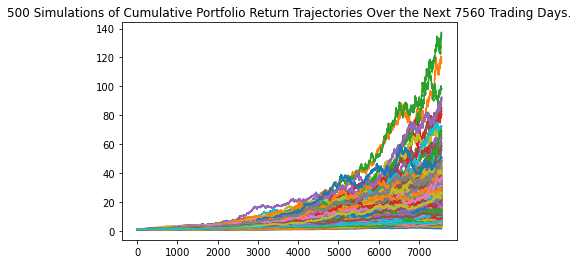

In [165]:
# simulation outcomes

porfilio_line_plot = MC_saving_portfolio.plot_simulation()

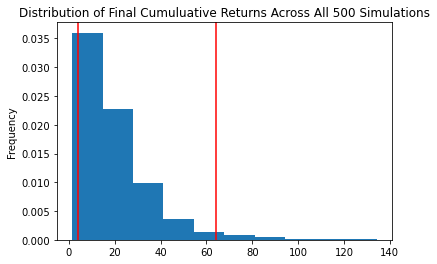

In [166]:
# probability distribution and confidence intervals

dist_plot = MC_saving_portfolio.plot_distribution()

In [168]:
#simulation summary

portfolio_tbl = MC_saving_portfolio.summarize_cumulative_return()

# Print summary statistics
print(portfolio_tbl)

count           500.000000
mean             20.104450
std              16.367129
min               1.426785
25%               9.266591
50%              15.495360
75%              25.787046
max             134.203936
95% CI Lower      3.994729
95% CI Upper     64.295853
Name: 7560, dtype: float64


In [175]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000 investments
ci_lower = round(portfolio_tbl[8]*20000,2)
ci_upper = round(portfolio_tbl[9]*20000,2)

print(f"There is a 95% chance that an initial investment of $20,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $20,000 in the portfolio over the next year will end within in the range of $79894.58 and $1285917.06.


In [176]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000 investments
ci_lower = round(portfolio_tbl[8]*30000,2)
ci_upper = round(portfolio_tbl[9]*0000,2)

print(f"There is a 95% chance that an initial investment of $20,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $20,000 in the portfolio over the next year will end within in the range of $119841.87 and $0.0.
